# Cálculo de propriedades termodinâmicas de substância pura [água] a partir de equação de estado [Peng-Robinson]

**Pedro-Andrade$^a$**, Fernando de Azevedo Medeiros$^{a,\dagger}$, Iuri Soter Viana Segtovich$^{a,\dagger}$ (January 2017)

${a}$) *Escola de Química, Universidade Federal do Rio de Janeiro, Rio de Janeiro, Brasil*

${\dagger}$) *Orientadores*

# Cálculo de Pressão de Saturação da Água

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Calcular pressão de saturação da água pura com PREOS

#Definição das constantes físicas e da EOS



T = 373
R = 8.3144598 
Tc = 647.1    #K
Tr = T/Tc
Pc = 220.55e5  #Pa

a = 0.45724*(R**2)*(Tc**2)/Pc
b = 0.0778*R*Tc/Pc
om = 0.345    #fator acêntrico
k = 0.37464 + 1.54226*om - 0.26992*(om**2)

e = 1-np.sqrt(2) #espilon da EOS cubica genérica para PR
s = 1+np.sqrt(2) #sigma da EOS cubica genérica par PR
#alfa = (1+k*(1-Tr**0.5))**2

#Definindo alfa para como função da temperatura
def func_alfa_de_T(T):
    Tr = T/Tc
    alfa = (1+k*(1-Tr**0.5))**2 
    return alfa


print ('Tc =',Tc,'Pc =', Pc,'Tr =', Tr)
print ('alfa =', func_alfa_de_T(T),'a =', a,'b =', b,'k =', k,'om =', om)


Tc = 647.1 Pc = 22055000.0 Tr = 0.5764178643177252
alfa = 1.4655105472784773 a = 0.6001337199553094 b = 1.8979203068053684e-05 k = 0.8745924719999999 om = 0.345


In [3]:
#definindo a equação de estado
def P_preos(T,V):
    return (R*T)/(V-b) - func_alfa_de_T(T)*a/(V**2 + 2*b*V - b**2)  #PREOS escrita para pressão
print (P_preos (T,0.0224))
print (R*T/0.0224)
print (func_alfa_de_T(0.983*Tc))
print (k)


136818.1390437065
138450.60291964284
1.0149875439090539
0.8745924719999999


In [6]:
#Para o cálculo das pressões de saturação, é necessário
#encontrar os volumes molares das fases
#Usando método de Newton Raphson para resolver o polinomio de 3o grau...

def V_preos(T,P):
    
    #definindo uma função alfa para ser recalculada em todas as temperaturas
    alfa = func_alfa_de_T(T)
        
    #coeficientes específicos de cada EoS
    #Método de Newton:    
    c3 = P
    c2 = P*b-R*T
    c1 = alfa*a - 3*P*b**2 - 2*b*R*T
    c0 = R*T*b**2 + P*b**3 - alfa*a*b
    
    RES=1
    TOL=1e-10
    MAX=1000
    i=0
    V=1.01*b#R*T/P
    V2=0
    V3=0

    while(RES>TOL and i<MAX): 
        V=V-(c3*V**3+c2*V**2+c1*V+c0)/(3*c3*V**2+2*c2*V+c1)
        RES=np.abs(c3*V**3+c2*V**2+c1*V+c0)
        i=i+1

#c4, c5 e c6, são os coeficientes da reduçao da ordem do polinomio em V    
    c4=c3
    c5=c2+c4*V
    c6=c1+c5*V
    
#Encontrada a primeira raiz, encontra-se as outras duas por Bhaskara    
    delta=(c5**2)-(4*c4*c6)
    
    if delta >= 0:
        V2=(-c5 + np.sqrt(delta))/(2*c4)
        V3=(-c5 - np.sqrt(delta))/(2*c4)
    else:
        #V2=0
        #V3=0
        V2= ((-c5))/(2*c4) #np.real((-c5 + np.sqrt(delta))/(2*c4))
        V3= ((-c5))/(2*c4)

#condicoes para validade das raízes
#se o volume molar (V) for menor que o volume molecular (b), as raizes não tem significado físico
    if V<b:
        V=0
    if V2<b:
        V2=0
    if V3<b:
        V3=0

    [V,V2,V3]=np.sort([V,V2,V3]) #cria um array com as 3 raizes do volume molar
    
    return [V,V2,V3]

#tryT=373 
tryP=101000
T=373
print (T)
[ansv1,ansv2,ansv3]=V_preos(T,tryP)


print ('volume molar da fase liquida = ',ansv1)
print ('raiz intermediaria = ',ansv2)
print ('volume molar da fase vapor = ', ansv3)



373
volume molar da fase liquida =  2.25075562575e-05
raiz intermediaria =  0.000225075251015
volume molar da fase vapor =  0.0304393142807


Para o cálculo das pressões de saturação com os volumes molares das duas fases, é necessário o calculo das fugacidades.
Para isso, utiliza-se a função de energia livre residual, que pode ser calculada, para a equação de Peng Robinson, por:

Gres/RT = Z - 1 - ln(Z - beta) - q*I

onde:
I = 1/(s-e) * ln((Z+s*beta)/(Z+e*beta));

s = 1+sqrt2;

e = 1-sqrt2;

Z = PV/RT ;

beta = Pb/RT;

q = a(T)/bRT;


In [7]:
P = 1.01e5 #Pa
V = 2.199754 #volume molar do liquido

def q_(T):
    return a*func_alfa_de_T(T)/(b*R*T)

def beta_(T,P):
    return P*b/(R*T)

def Z_(T,P,V):
    return P*V/(R*T)

def I_(T,P,V):
    I_local = (1/(s-e))*np.log((Z_(T,P,V)+s*beta_(T,P))/(Z_(T,P,V)+e*beta_(T,P)))
    return I_local

def G_res(T,P,V):
    return (Z_(T,P,V) - 1 - np.log(Z_(T,P,V) - beta_(T,P)) - q_(T)*I_(T,P,V)) #G/RT !!!

Vs=V_preos(T,P)
print(Vs)
#print(V_preos(T,P))
print('G0 = ',G_res(T,P,Vs[0]))
print('G1 = ',G_res(T,P,Vs[1]))
print('G2 = ',G_res(T,P,Vs[2]))

print ('z-beta = ',Z_(T,P,Vs[0]) - beta_(T,P)) 





[2.250755625750025e-05, 0.00022507525101545664, 0.030439314280748097]
G0 =  -0.0642498419362
G1 =  2.84447455219
G2 =  -0.00864923088033
z-beta =  0.000114908076747


In [8]:
def P_sat(T,iguess_P):  #aqui é dado um T (ok)
    RES=1
    TOL=1e-10
    MAX=1000
    i=0
    P=iguess_P #AQUI VOCÊ CHUTA UM P (ok)
  
    while(RES>TOL and i<MAX): 
    
        [V_L,_,V_V]=V_preos(T,P) #aqui vc calcula os volumes para esse par (T,P) (ok)
        #print([V_L,_,V_V])
        phi_L=np.exp(G_res(T,P,V_L)) #aqui vc calcula o Gres pa cada caso
        phi_V=np.exp(G_res(T,P,V_V))
       
        P=P*(phi_L/phi_V) #aqui vc atualiza o P em busca do P que resolve seu problema de calculo de equilibrio de fases
        
        #print('P_it = ',P) #esse print deixa vc acompanhar o andamento do calculo e ver se está convergindo ou divergindo
        RES=abs(phi_L/phi_V-1) #não se esqueça de usar o ABS para gerar um valor em MÓDULO
        i=i+1
        #print("P,V_L,V_V,phi_L,phi_V")
        #print(P,V_L,V_V,phi_L,phi_V,phi_L/phi_V-1.)
    return P

Psat=P_sat(353,1e5) 
print("Psat = ",Psat)
Psat=P_sat(363,1e5) 
print("Psat = ",Psat)
Psat=P_sat(373,1e5) 
print("Psat = ",Psat)
Psat=P_sat(383,1e5) 
print("Psat = ",Psat)
Psat=P_sat(393,1e5) 
print("Psat = ",Psat)

Psat =  43610.6251582
Psat =  65354.7369702
Psat =  95488.5440279
Psat =  136323.301796
Psat =  190542.513237


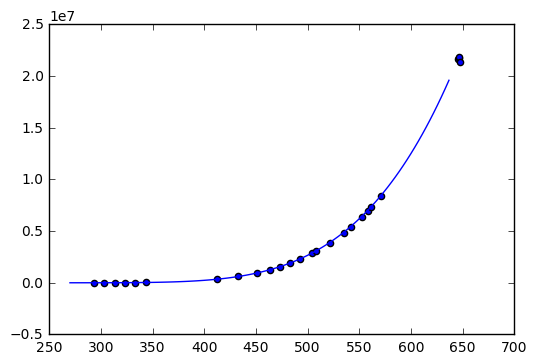

In [9]:
#Criando eixos T e P para plotar a curva de Psat
#T=373
table = np.loadtxt('psat_h202.txt',dtype='float',skiprows=0,usecols=None,unpack=False, ndmin=0)

guessP=10000
Taxis=np.linspace(270,0.984*Tc,100)
Paxis=np.zeros(100)
Paxis[0]=P_sat(Taxis[0],guessP)
for i in range(1,100):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    #print(Paxis[i])
    
plt.plot(Taxis,Paxis)
plt.scatter(table[:,0],table[:,1]*1000) #As pressões no arquivo estão em KPa
plt.show()


In [10]:
def Pantoine(T):
    A = 16.3872
    B = 3885.70
    C = 230.170
    return (np.exp(A - B/(T-273 + C)))*1000
PsatA = Pantoine(T)
print (PsatA)
print ('@T = ',T)

101333.212771
@T =  373


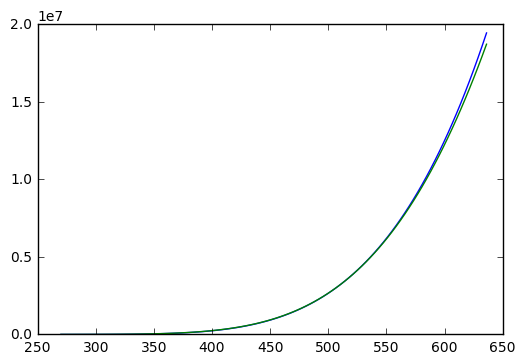

In [11]:
guessP=10000
Taxis=np.linspace(270,0.983*Tc,100) #faixa de validade dos parâmetros de Antoine
Paxis=np.zeros(100)
Paxis[0]=P_sat(Taxis[0],guessP)
for i in range(1,100):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    
Paxis2=np.zeros(100)
#for i in range(0,100):
    #Paxis2[i]=Pantoine(Taxis[i])
    
Paxis2=Pantoine(Taxis)
    
plt.plot(Taxis,Paxis)
plt.plot(Taxis,Paxis2)
plt.show()
#Peng-Robinson: Azul
#Antoine: verde

In [12]:
#Cálculo de outras propriedades residuais
#Entalpia
Tv = np.array([333,343,353,363,373,383,393,])
def Tr_(T):
    return T/Tc

def H_res(T,P,V):
    return R*T*(Z_(T,P,V) - 1 + (Tr_(T)/(func_alfa_de_T(T))*(k**2-k/(np.sqrt(Tr_(T))) -k**2/np.sqrt(Tr_(T)))-1)*q_(T)*I_(T,P,V))


Vs=V_preos(T,P)
#print(Vs)
#print(V_preos(T,P))
print('HL = ',H_res(Tv,P,Vs[0]))
print(' ')
#print('H- = ',H_res(T,P,Vs[1]))
print('HV = ',H_res(Tv,P,Vs[2]))
print(' ')

def deltaHvap(Tv):
    return H_res(Tv,P,Vs[2]) - H_res(Tv,P,Vs[0])

print ('delta H de vaporização = ', H_res(Tv,P,Vs[2]) - H_res(Tv,P,Vs[0]), 'J/mol')
print(' ')

deltaHtab = np.array([42454.8,42012,41544,41097.6,40624.2,40140,39639.6])
desvioH = np.abs((deltaHvap(Tv)-deltaHtab)/deltaHtab)
print(' ')
print ('Desvio do modelo = ',desvioH)

HL =  [-43021.98260168 -42803.3165465  -42589.01892003 -42378.90535379
 -42172.80409429 -41970.55482668 -41772.00763585]
 
HV =  [ 259.5892461   176.79002478   93.98580446   11.17679611  -71.63680372
 -154.45481157 -237.27705589]
 
delta H de vaporização =  [ 43281.57184778  42980.10657128  42683.00472449  42390.0821499
  42101.16729057  41816.10001511  41534.73057996] J/mol
 
 
Desvio do modelo =  [ 0.01947417  0.02304357  0.02741683  0.03144909  0.03635683  0.04175635
  0.04780902]


In [13]:
#entropia
Tv = np.array([333,343,353,363,373,383,393])
def S_res (T,P,V):
    return R*(np.log(Z_(T,P,V)-beta_(T,P))+q_(T)*I_(T,P,V)*(Tr_(T)/(func_alfa_de_T(T))*(k**2-k/(np.sqrt(Tr_(T))) -k**2/np.sqrt(Tr_(T)))))

def deltaSvap(Tv):
    return S_res(Tv,P,Vs[2]) - S_res(Tv,P,Vs[0])

Vs=V_preos(T,P)
#print(Vs)
print(' ')
#print(V_preos(T,P))
print('SL = ',S_res(Tv,P,Vs[0]))
print(' ')
print('SV = ',S_res(Tv,P,Vs[2]))
print(' ')
print ('delta S de vaporização = ',S_res(Tv,P,Vs[2]) - S_res(Tv,P,Vs[0]),'J/mol.K')
print(' ')
deltaStab = np.array([127.4367,122.4306,117.684,113.1714,108.873,104.765,100.8306])
desvioS = np.abs((deltaSvap(Tv)-deltaStab)/deltaStab)
print ('Desvio do modelo = ',desvioS)

 
SL =  [-114.93959618 -114.29257542 -113.67670585 -113.08973164 -112.52961522
 -111.99451102 -111.48274303]
 
SV =  [ 0.81917922  0.57419328  0.33623378  0.10490869 -0.12014209 -0.3392501
 -0.55272129]
 
delta S de vaporização =  [ 115.75877541  114.8667687   114.01293963  113.19464033  112.40947313
  111.65526091  110.93002173] J/mol.K
 
Desvio do modelo =  [ 0.09163706  0.06178056  0.03119422  0.00020536  0.03248255  0.06576873
  0.10016227]


As propriedades residuais foram calculadas utilizando as expressões 6.67 e 6.68 do Van Ness para calculo de propriedades residuais por equação de estado.

Os dados experimentais utilizados para comparação foram obtidos na tabela de propriedades de vapor superaquecido para água.

Os critérios de comparação foram a variação de entalpia e entropia de vaporização.

Pela definição de propriedade residual: M_res = M - M_gi

Em um estado de referência adequado para ambas as fases, a variação da propriedade real é igual a da propriedade residual, por isso pode ser usado como critério de comparação.

Os desvios observados foram todos menores ou iguais a 10%, o que prova que nesta faixa de temperaturas, este modelo pode ser usado para o calculo das entalpias e entropias de vaporização da água.

_______________________________________________________________________________________________________________________________
_______________________________________________________________________________________________________________________________

Diagramas de Propriedades de Substâncias Puras

a) Diagrama PxV

b) Diagrama lnPxH

c) Diagrama TxS


# isotermas

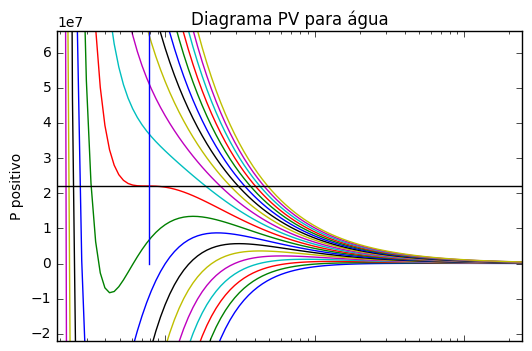

In [14]:
#diagrama PxV para a água

for T in np.linspace(.1,2,20)*Tc:
    Vmi = np.exp(np.linspace(np.log(b*1.1),np.log((R*Tc/Pc)*100.),100))
    
    
    #print(Vmi)
    #print(P_preos(T,Vmi))
    
    
    
    plt.figure(1)
    
    #print(Pc,Tc)
    

    
    #print(V_preos(Tc,Pc))
    
    plt.semilogx(Vmi,P_preos(T,Vmi)) 
    plt.ylabel('P positivo') 
    plt.title('Diagrama PV para água') 
    
    plt.ylim(-Pc,3*Pc)
    
    plt.xlim(b,(R*Tc/Pc)*100)

    plt.tick_params( 
    axis='x',        
    which='both',    
    bottom='on',     
    top='on',        
    labelbottom='off') 

plt.semilogx([1e-9,1e9],[Pc,Pc])
plt.semilogx([V_preos(Tc,Pc)[2],V_preos(Tc,Pc)[2]],[1e-9,1e9])
    
plt.show()

# envelope

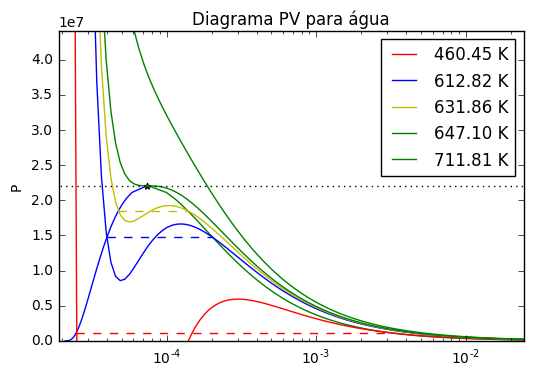

In [215]:
#diagrama PxV para a água

plt.figure(1)

guessP=10000
Taxis=np.linspace(270,Tc,100)
Paxis=np.zeros(100)
VLaxis=np.zeros(100)
VVaxis=np.zeros(100)

Paxis[0]=P_sat(Taxis[0],guessP)
for i in range(1,100):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    Vs=V_preos(Taxis[i],Paxis[i])
    VLaxis[i]=Vs[0]
    VVaxis[i]=Vs[2]
    
Tcolors=['r','b','y','g']


plt.semilogx(VLaxis,Paxis)
plt.semilogx(VVaxis,Paxis)

keyTs = np.array([50,90,95,99])


#for i in np.arange(0,100,33):
j=-1
for i in keyTs:
    j+=1
    plt.semilogx([VLaxis[i],VVaxis[i]],[Paxis[i],Paxis[i]],color=Tcolors[j],ls='--')


#for T in Taxis[np.arange(0,100,33)]:

j=-1
for i in keyTs:
    j+=1
    T=Taxis[i]
    Vmi = np.exp(np.linspace(np.log(b*1.01),np.log((R*Tc/Pc)*100.),100))
    
          
    plt.semilogx(Vmi,P_preos(T,Vmi),color=Tcolors[j],label='{:.{prec}f}'.format(T, prec=2)+' K') 
    
T=1.1*Tc
Vmi = np.exp(np.linspace(np.log(b*1.01),np.log((R*Tc/Pc)*100.),100))
plt.semilogx(Vmi,P_preos(T,Vmi),color=Tcolors[j],label='{:.{prec}f}'.format(T, prec=2)+' K')     
    
plt.ylabel('P') 
plt.title('Diagrama PV para água') 
    
plt.ylim(0,2*Pc)
    
plt.xlim(b,(R*Tc/Pc)*100)

plt.tick_params( 
axis='x',        
which='both',    
bottom='on',     
top='on',        
labelbottom='on') 

plt.semilogx([1e-9,1e9],[Pc,Pc],color='k',ls=':')
    
plt.scatter(VLaxis[99],Pc,marker='*')
    
plt.legend(loc=1)    
plt.show()

In [196]:
#Diagrama ln.PxH

#Coeficientes para calcular Cp
Cp_=np.array([4.395,-4.186*10**-3,1.405*10**-5,-1.564*10**-8,0.632*10**-11])

def H_ideal(T):
        Tref=273.15 #Temperatura de referência para cálculo do H ideal (Cp)
        H_ideal=R*(Cp_[4]/5*(T**5-Tref**5)+Cp_[3]/4*(T**4-Tref**4)+Cp_[2]/3*(T**3-Tref**3)+Cp_[1]/2*(T**2-Tref**2)+Cp_[0]*(T-Tref))
        return H_ideal
    
def H_real(T,P,V):
        H_real=H_ideal(T)+H_res(T,P,V)
        return H_real    
#print (H_real(T,P,Vs[0]))


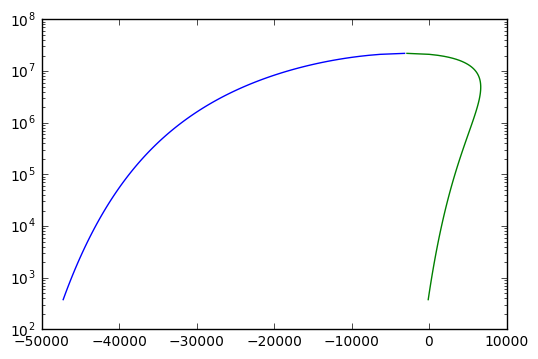

In [197]:
#Gráfico ln(P)xH
HLaxis=np.zeros(100)
HVaxis=np.zeros(100)
Taxis = np.linspace(270,Tc,100)
Paxis = np.zeros(100)

Paxis[0]=P_sat(Taxis[0],guessP)
Vs=V_preos(Taxis[0],Paxis[0])
HLaxis[0]=H_real(Taxis[0],Paxis[0],Vs[0])
HVaxis[0]=H_real(Taxis[0],Paxis[0],Vs[2])



for i in range(1,100):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    Vs=V_preos(Taxis[i],Paxis[i])
    HLaxis[i]=H_real(Taxis[i],Paxis[i],Vs[0])
    HVaxis[i]=H_real(Taxis[i],Paxis[i],Vs[2])

# Plot envelope
plt.semilogy(HLaxis,Paxis)
plt.semilogy(HVaxis,Paxis)

plt.show()

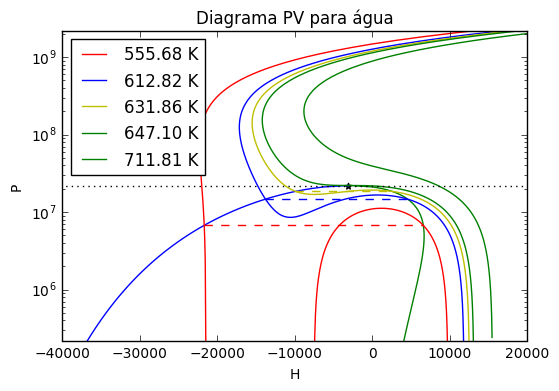

In [217]:
#Gráfico ln(P)xH
HLaxis=np.zeros(100)
HVaxis=np.zeros(100)
Taxis = np.linspace(270,Tc,100)
Paxis = np.zeros(100)

Paxis[0]=P_sat(Taxis[0],guessP)
Vs=V_preos(Taxis[0],Paxis[0])
HLaxis[0]=H_real(Taxis[0],Paxis[0],Vs[0])
HVaxis[0]=H_real(Taxis[0],Paxis[0],Vs[2])



for i in range(1,100):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    Vs=V_preos(Taxis[i],Paxis[i])
    HLaxis[i]=H_real(Taxis[i],Paxis[i],Vs[0])
    HVaxis[i]=H_real(Taxis[i],Paxis[i],Vs[2])

# Plot envelope
plt.semilogy(HLaxis,Paxis)
plt.semilogy(HVaxis,Paxis)

#### ISOPLETHES isotherms

keyTs = np.array([75,90,95,99])

#for i in np.arange(0,100,33):
j=-1
for i in keyTs:
    j+=1
    plt.semilogy([HLaxis[i],HVaxis[i]],[Paxis[i],Paxis[i]],color=Tcolors[j],ls='--')    


j=-1
for i in keyTs:
    j+=1
    T=Taxis[i]

    #grid in H by means of grid in V

    Vmi = np.exp(np.linspace(np.log(b*1.01),np.log((R*Tc/Pc)*100.),1000))
    
    P = np.zeros(1000)
    H = np.zeros(1000)
    
    i=-1
    for V in Vmi:
        i+=1
        P[i]=P_preos(T,V)
        H[i] = H_real(T,P[i],V)
        #print(V)
        #print(P[i])
        #print(H[i])
    plt.semilogy(H,P,color=Tcolors[j],label='{:.{prec}f}'.format(T, prec=2)+' K') 

T=1.1*Tc
i=-1
for V in Vmi:
    i+=1
    P[i]=P_preos(T,V)
    H[i] = H_real(T,P[i],V)
    #print(V)
    #print(P[i])
    #print(H[i])
plt.semilogy(H,P,color=Tcolors[j],label='{:.{prec}f}'.format(T, prec=2)+' K')

    
plt.ylabel('P') 
plt.title('Diagrama PV para água') 


    
plt.ylim(Pc/100,Pc*100)
    
plt.xlim(-4e4,2e4)
#
plt.tick_params( 
axis='x',        
which='both',    
bottom='on',     
top='on',        
labelbottom='on') 

plt.semilogy([-4e6,2e6],[Pc,Pc],color='k',ls=':')
    
#plt.scatter(VLaxis[99],Pc,marker='o')
    
plt.legend(loc=2)       

plt.xlabel('H')

plt.scatter(HLaxis[99],Pc,marker='*')

plt.show()

In [202]:
#diagrama TxS
def S_ideal(T,P):
        Pref=1*10**5 #Pa
        
        Tref=273.15 #K
        S_ideal=R*(Cp_[4]/4*(T**4-Tref**4)+Cp_[3]/3*(T**3-Tref**3)+Cp_[2]/2*(T**2-Tref**2)+Cp_[1]*(T-Tref)+Cp_[0]*np.log(T/Tref))-R*np.log(P/Pref)    
        return S_ideal

def S_real(T,P,V):
        S_real=S_ideal(T,P)+S_res(T,P,V)    
        return S_real

In [203]:
def Tantoine(P):
    A = 16.3872
    B = 3885.70
    C = 230.170
    return (C + B/(A-np.log(P*.001))) - 273
TsatA = Tantoine(P)
print (Tantoine(100000))

286.968859903


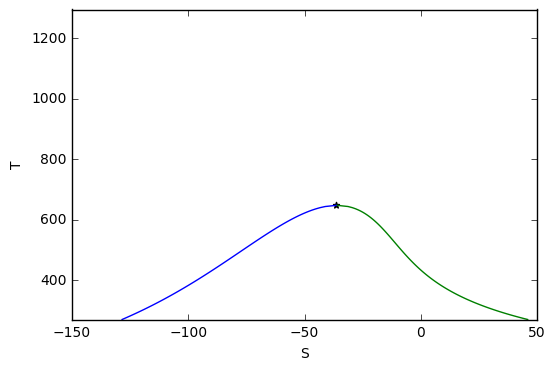

In [211]:
#Gráfico ln(P)xH
SLaxis=np.zeros(100)
SVaxis=np.zeros(100)
Taxis = np.linspace(270,Tc,100)
Paxis = np.zeros(100)

Paxis[0]=P_sat(Taxis[0],guessP)
Vs=V_preos(Taxis[0],Paxis[0])
SLaxis[0]=S_real(Taxis[0],Paxis[0],Vs[0])
SVaxis[0]=S_real(Taxis[0],Paxis[0],Vs[2])



for i in range(1,100):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    Vs=V_preos(Taxis[i],Paxis[i])
    SLaxis[i]=S_real(Taxis[i],Paxis[i],Vs[0])
    SVaxis[i]=S_real(Taxis[i],Paxis[i],Vs[2])

# Plot envelope
plt.plot(SLaxis,Taxis)
plt.plot(SVaxis,Taxis)

#
plt.tick_params( 
axis='x',        
which='both',    
bottom='on',     
top='on',        
labelbottom='on') 


    

    
#plt.legend(loc=2)       

plt.xlabel('S')
plt.ylabel('T')

plt.xlim(-150,50)
plt.ylim(270,2*Tc)

plt.scatter(SLaxis[99],Tc,marker='*')

plt.show()    



In [212]:
def T_vdw(P,V):
    T = (P + a/V**2)*(V-b)/R
    return T

def T_preos(P,V):
    from scipy import optimize as opt
    REST = lambda T: P_preos(T,V)-P
    SOLVE=opt.bisect
    igT=T_vdw(P,V)
    try:
        T = SOLVE(REST,
              igT*.19,
              igT*10.1
             )
    except ValueError:
        print('P',P)
        print('V',V)
        print(igT,igT*.9, REST(igT*.9),igT*1.1,REST(igT*1.1))
        raise ValueError
    return T

T=274
V=22.4/(1000)
P=P_preos(T,V)
print(T_preos(P,V))
print(T_preos(P*1.1,V))
print(T_preos(P*1.2,V))

274.00000000000045
300.6278775111672
327.26977174222003


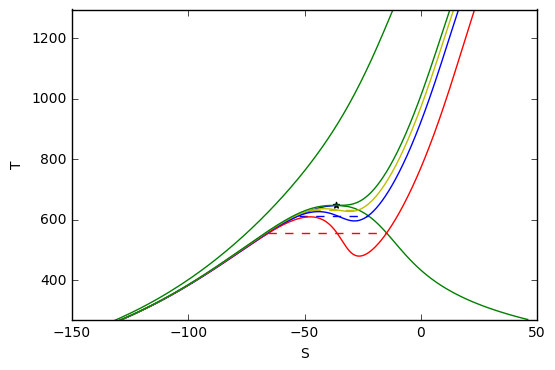

In [219]:
#Gráfico ln(P)xH
SLaxis=np.zeros(100)
SVaxis=np.zeros(100)
Taxis = np.linspace(270,Tc,100)
Paxis = np.zeros(100)

Paxis[0]=P_sat(Taxis[0],guessP)
Vs=V_preos(Taxis[0],Paxis[0])
SLaxis[0]=S_real(Taxis[0],Paxis[0],Vs[0])
SVaxis[0]=S_real(Taxis[0],Paxis[0],Vs[2])



for i in range(1,100):
    Paxis[i]=P_sat(Taxis[i],Paxis[i-1])
    Vs=V_preos(Taxis[i],Paxis[i])
    SLaxis[i]=S_real(Taxis[i],Paxis[i],Vs[0])
    SVaxis[i]=S_real(Taxis[i],Paxis[i],Vs[2])

# Plot envelope
plt.plot(SLaxis,Taxis)
plt.plot(SVaxis,Taxis)

#### ISOPLETHES isotherms

keyTs = np.array([75,90,95,99])

#for i in np.arange(0,100,33):
j=-1
for i in keyTs:
    j+=1
    plt.plot([SLaxis[i],SVaxis[i]],[Taxis[i],Taxis[i]],color=Tcolors[j],ls='--')    

j=-1
for i in keyTs:
    j+=1
    P=Paxis[i]

    #grid in H by means of grid in V

    Vmi = np.exp(np.linspace(np.log(b*1.01),np.log((R*Tc/Pc)*100.),1000))
    
    T = np.zeros(1000)
    S = np.zeros(1000)
    
    i=-1
    for V in Vmi:
        i+=1
        T[i]=T_preos(P,V)
        S[i] = S_real(T[i],P,V)
        #print(V)
        #print(P[i])
        #print(H[i])
    plt.plot(S,T,color=Tcolors[j],label='{:.{prec}f}'.format(P, prec=2)+' K') 
    

P=10*Pc

#grid in H by means of grid in V

Vmi = np.exp(np.linspace(np.log(b*1.01),np.log((R*Tc/Pc)*100.),1000))

T = np.zeros(1000)
S = np.zeros(1000)

i=-1
for V in Vmi:
    i+=1
    T[i]=T_preos(P,V)
    S[i] = S_real(T[i],P,V)
    #print(V)
    #print(P[i])
    #print(H[i])
plt.plot(S,T,color=Tcolors[j],label='{:.{prec}f}'.format(P, prec=2)+' K')     
    

#
plt.tick_params( 
axis='x',        
which='both',    
bottom='on',     
top='on',        
labelbottom='on') 


    

    
#plt.legend(loc=2)       

plt.xlabel('S')
plt.ylabel('T')

plt.xlim(-150,50)
plt.ylim(270,2*Tc)

plt.scatter(SLaxis[99],Tc,marker='*')


plt.show()    

